In [11]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Use ridge regression with different lambdas and poly degrees to make the predictions

In [12]:
from proj1_helpers import *
from helpers import *
from implementations import *

In [13]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval] for k in range(k_fold)]
    return np.array(k_indices)

In [14]:
from plots import cross_validation_visualization
from build_polynomial import *

def cross_validation_demo(poly_degree):
    seed = 1
    degree = poly_degree
    k_fold = 4
    lambdas = np.logspace(-4, 0, 30)
    #lambdas = np.logspace(-2, 0, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    # cross validation
    for lambda_ in lambdas:
        rmse_tr_tmp = []
        rmse_te_tmp = []
        for k in range(k_fold):
            loss_tr, loss_te,w = cross_validation(y, tx, k_indices, k, lambda_, degree)
            rmse_tr_tmp.append(loss_tr)
            rmse_te_tmp.append(loss_te)
        rmse_tr.append(np.mean(rmse_tr_tmp))
        rmse_te.append(np.mean(rmse_te_tmp))

    cross_validation_visualization(lambdas, rmse_tr, rmse_te,degree)

In [43]:
from plots import cross_validation_visualization_poly
from build_polynomial import *

def cross_validation_demo_poly(lambda_):
    seed = 1
    degrees = np.array([2,3,4,5,6,7,8])
    k_fold = 4
    #lambdas = np.logspace(-2, 0, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    # cross validation
    for degree in degrees:
        print(degree)
        rmse_tr_tmp = []
        rmse_te_tmp = []
        for k in range(k_fold):
            loss_tr, loss_te,w = cross_validation(y, tx, k_indices, k, lambda_, degree)
            rmse_tr_tmp.append(loss_tr)
            rmse_te_tmp.append(loss_te)
        rmse_tr.append(np.mean(rmse_tr_tmp))
        rmse_te.append(np.mean(rmse_te_tmp))

    cross_validation_visualization_poly(degrees, rmse_tr, rmse_te,degree)

In [15]:
def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    # get k'th subgroup in test, others in train
    te_indice = k_indices[k]
    tr_indice = k_indices[~(np.arange(k_indices.shape[0]) == k)]
    tr_indice = tr_indice.reshape(-1)
    y_te = y[te_indice]
    y_tr = y[tr_indice]
    x_te = x[te_indice]
    x_tr = x[tr_indice]
    # form data with polynomial degree
    tx_tr = build_poly(x_tr, degree)
    tx_te = build_poly(x_te, degree)
    # ridge regression
    w = ridge_regression(y_tr, tx_tr, lambda_)
    # calculate the loss for train and test data
    loss_tr = np.sqrt(2 * compute_loss(y_tr, tx_tr, w))
    loss_te = np.sqrt(2 * compute_loss(y_te, tx_te, w))
    return loss_tr, loss_te,w

In [16]:
y_data,x_data,ind=load_csv_data('data/train.csv/train.csv')

In [47]:

#X=x_data[:,[1,2,3,7,8,9,10,11]] #raw data
#X=x_data[:,13:22] # computed data
#X=x_data[:,[1,2,3,7,8,9,10,11,13,14,15,16,17,18,19,20,21,22]] # computed data
#X=x_data[:,[1,2,3,7,8,9,10,13,14,16,17,19,21,22,29]] # without phi
#X=x_data[:,[1,2,3,7,8,9,10,11,13,14,15,16,17,18,19,20,21,22,29]] # wihtout -999
X=x_data[:,[0,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,17,19,20,21,22,23,24,25,26,27,28,29]] # without 11 and 18
#X=x_data

y_samp, x_samp = sample_data(y_data, X, 1, size_samples=50000)
#y_samp =y_data
#x_samp = X
#x_samp, mean_x, std_x = standardize(x_samp)
x_samp, mean_x, std_x=standardizeNan(x_samp)
tx = np.c_[np.ones((y_samp.shape[0], 1)), x_samp]
initial_w = np.zeros((tx.shape[1], 1))

y = np.expand_dims(y_samp, axis=1)
print(tx.shape)
print(y.shape)
print(initial_w.shape)
print(X[:,22])



(50000, 29)
(50000, 1)
(29, 1)
[  2.15000000e+00   7.25000000e-01   2.05300000e+00 ...,   1.80000000e+00
  -9.99000000e+02  -9.99000000e+02]


In [8]:
print(tx.dot(initial_w).shape)


(250000, 1)


In [9]:
w = least_squares(y, tx)
print(w)

[[ -3.14664000e-01]
 [  3.84206260e-02]
 [ -2.66864535e-01]
 [ -2.96643992e-01]
 [  1.03830326e-01]
 [  2.46304794e-02]
 [  9.18488433e-02]
 [  5.49221397e-03]
 [  3.02096484e-01]
 [ -2.73753617e-02]
 [ -2.96157221e+02]
 [ -2.04428308e-01]
 [  7.81096815e-02]
 [  5.75295451e+01]
 [ -5.81785720e-04]
 [ -1.77089592e-03]
 [  5.67652459e+01]
 [ -8.72989306e-04]
 [  6.83059509e-02]
 [  9.49508615e-04]
 [ -4.03397650e-02]
 [  3.56221415e-02]
 [ -8.40473273e-02]
 [  8.97910898e-04]
 [ -4.82776162e-04]
 [ -4.38393291e-02]
 [  1.43744852e-03]
 [ -2.39474385e-03]
 [  2.50913858e+02]]


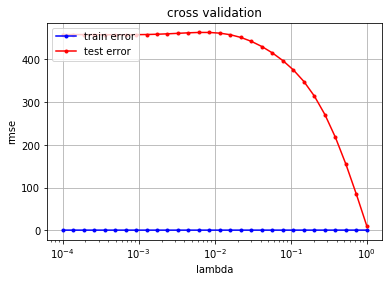

In [10]:
cross_validation_demo(5) # poly 5 derived data


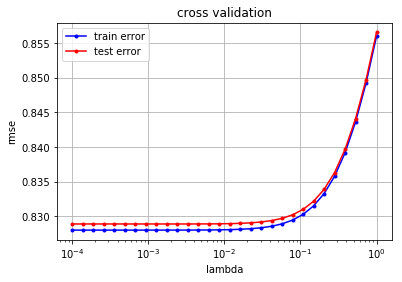

In [224]:
cross_validation_demo(3) #poly 3 derived data

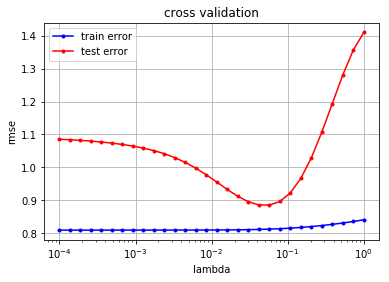

In [225]:
cross_validation_demo(7)#poly 7 derived data

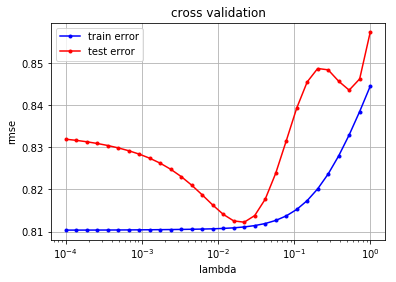

In [226]:
cross_validation_demo(6)#poly 6 derived data

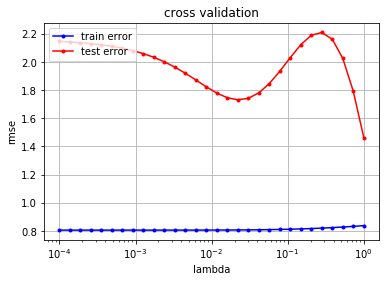

In [227]:
cross_validation_demo(8)#poly 8 computed data

In [ ]:
#FULL data features with prePro

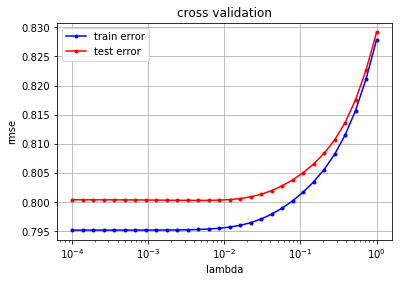

In [24]:

cross_validation_demo(2)#poly 3 computed Full data



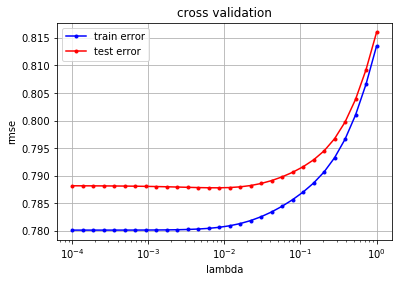

In [25]:

cross_validation_demo(3)#poly 3 computed Full data



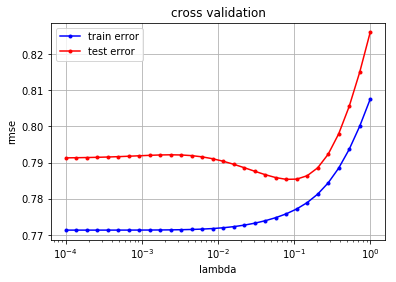

In [26]:
cross_validation_demo(4)#poly 3 computed Full data


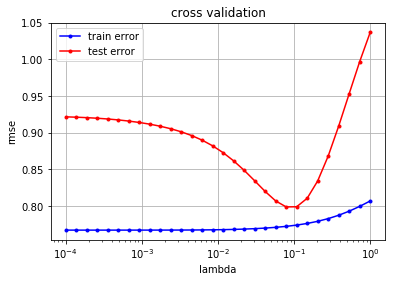

In [27]:
cross_validation_demo(5)#poly 3 computed Full data


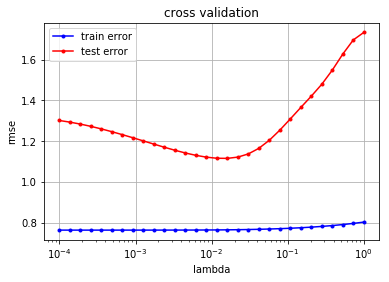

In [28]:
cross_validation_demo(6)#poly 3 computed Full data



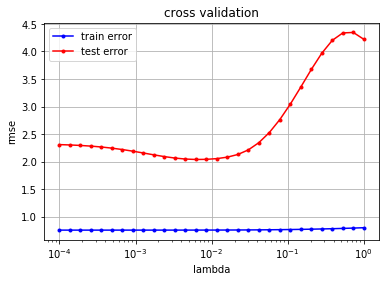

In [32]:
cross_validation_demo(7)#poly 3 computed Full data



In [33]:
tx_tr = build_poly(tx, 2) # full set 250K only computed data
w=ridge_regression(y, tx_tr, 0.02)
y_prime = predict_labels(w,tx_tr)
loss=compute_loss(y_prime,tx_tr,w);
print(loss)

[[ 0.19445875]]


In [34]:
tx_tr = build_poly(tx, 3) # full set 250K only computed data
w=ridge_regression(y, tx_tr, 0.02)
y_prime = predict_labels(w,tx_tr)
loss=compute_loss(y_prime,tx_tr,w);
print(loss)

[[ 0.18764881]]


In [36]:
tx_tr = build_poly(tx, 5) # full set 250K only computed data
w=ridge_regression(y, tx_tr, 0.02)
y_prime = predict_labels(w,tx_tr)
loss=compute_loss(y_prime,tx_tr,w);
print(loss)

[[ 0.18789043]]


In [35]:
tx_tr = build_poly(tx, 4) # full set 250K only computed data
w=ridge_regression(y, tx_tr, 0.02)
y_prime = predict_labels(w,tx_tr)
loss=compute_loss(y_prime,tx_tr,w);
print(loss)

[[ 0.18756768]]


In [29]:
tx_tr = build_poly(tx, 6) # full set 250K only computed data
w=ridge_regression(y, tx_tr, 0.02)
y_prime = predict_labels(w,tx_tr)
loss=compute_loss(y_prime,tx_tr,w);
print(loss)# the minimum obtained with the full set is with poly 6

[[ 0.18497903]]


In [37]:
tx_tr = build_poly(tx, 7) # full set 250K all data features
w=ridge_regression(y, tx_tr, 0.02)
y_prime = predict_labels(w,tx_tr)
loss=compute_loss(y_prime,tx_tr,w);
print(loss)

[[ 0.17955915]]


2
3
4
5
6
7
8


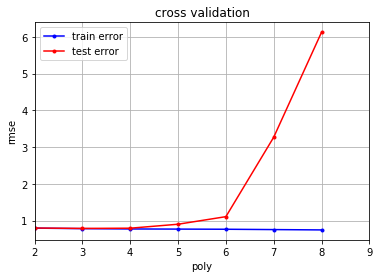

In [48]:
cross_validation_demo_poly(0.02)

2
3
4
5
6
7
8


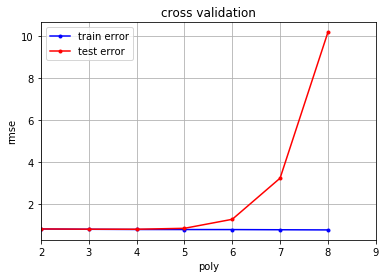

In [49]:
cross_validation_demo_poly(0.1)

In [31]:
tx_tr = build_poly(tx, 6) # full set 250K all data features
w=ridge_regression(y, tx_tr, 0.002)
y_prime = predict_labels(w,tx_tr)
loss=compute_loss(y_prime,tx_tr,w);
print(loss)

[[ 0.18265256]]


In [327]:
tx_tr = build_poly(tx, 3) # full set 250K all data features
w=ridge_regression(y, tx_tr, 0.001)
y_prime = predict_labels(w,tx_tr)

sum(abs(y_prime-y))#5th submission 

array([ 115744.])

In [537]:
polyN = 5
tx_tr = build_poly(tx, polyN) # full set 250K all data features with preprocessing
w=ridge_regression(y, tx_tr, 0.0001)
y_prime = predict_labels(w,tx_tr)
sum(abs(y_prime-y))#9th sub B

array([ 20108.])

In [521]:
polyN = 5
tx_tr = build_poly(tx, polyN) # full set 250K all data features no prepro
w=ridge_regression(y, tx_tr, 0.0001)
y_prime = predict_labels(w,tx_tr)
sum(abs(y_prime-y))#7th submission 

array([ 101998.])

In [11]:
polyN = 5
tx_tr = build_poly(tx, polyN) # full set 250K all data features with preprocessing
w=ridge_regression(y, tx_tr, 0.0001)
y_prime = predict_labels(w,tx_tr)
sum(abs(y_prime-y))

array([ 102004.])

In [14]:
polyN = 5
tx_tr = build_poly(tx, polyN) # full set 250K all data features with preprocessing
w=least_squares(y, tx_tr)
y_prime = predict_labels(w,tx_tr)
sum(abs(y_prime-y))


array([ 102040.])

In [87]:
polyN = 2
tx_tr = build_poly(tx, polyN) # ridge | poly 5| lambda 0.0001|all features w0 11 &18|prepro Nan
#tx_tr[:,23]=X[:,22]
#w=least_squares(y, tx_tr)
loss,w=least_squares_SGD(y, tx_tr, initial_w, 40, 0.01)
y_prime = predict_labels(w,tx_tr)
sum(abs(y_prime-y))# 12th submission

C:\Users\sara\Documents\MachineLearning\Projects\Proj1\project1\scripts\proj1_helpers.py:30: RuntimeWarning: invalid value encountered in less_equal
  y_pred[np.where(y_pred <= 0)] = -1
C:\Users\sara\Documents\MachineLearning\Projects\Proj1\project1\scripts\proj1_helpers.py:31: RuntimeWarning: invalid value encountered in greater
  y_pred[np.where(y_pred > 0)] = 1


array([ nan])

In [604]:
polyN = 6
tx_tr = build_poly(tx, polyN) # ridge | poly 6| lambda 0.0001|all features w0 11 &18|prepro Nan

w=ridge_regression(y, tx_tr, 0.0001)
y_prime = predict_labels(w,tx_tr)
sum(abs(y_prime-y))# 12th submission

array([ 101020.])

In [40]:
#create subsmission with the previous computed w should take the features accordingly
y_data,x_data,ind=load_csv_data('data/test.csv/test.csv')
#X=x_data[:,[1,2,3,7,8,9,10,11]] #raw data
#X=x_data[:,[1,2,3,7,8,9,10,11,13,14,15,16,17,18,19,20,21,22]] # all data
#X=x_data[:,13:22] # computed data
#X=x_data[:,[0,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,17,19,20,21,22,23,24,25,26,27,28,29]] # without phi
X=x_data
y_samp =y_data
x_samp = X
x_samp, mean_x, std_x = standardizeNan(x_samp)
tx = np.c_[np.ones((y_samp.shape[0], 1)), x_samp]
initial_w = np.zeros((tx.shape[1], 1))
y = np.expand_dims(y_samp, axis=1)
tx_tr = build_poly(tx, polyN) # full set 250K
y_prime = predict_labels(w,tx_tr)
create_csv_submission(ind, y_prime, 'data/sample-submission.csv')